# mouse model

## get positive and negative samples

In [1]:
import pandas as pd
import pyranges as pr
import numpy as np

In [2]:
genepr=pr.read_gtf('/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode_mm10/gencode.vM23.annotation.gtf')
genepr

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_type,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont
0,chr1,HAVANA,gene,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,TEC,4933401J01Rik-201,NA,basic,OTTMUST00000127109.1,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,TEC,4933401J01Rik-201,NA,basic,OTTMUST00000127109.1,1,ENSMUSE00001343744.1,NaN,NaN,NaN
3,chr1,ENSEMBL,gene,3102015,3102125,.,+,.,ENSMUSG00000064842.1,snRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,ENSEMBL,transcript,3102015,3102125,.,+,.,ENSMUSG00000064842.1,snRNA,...,snRNA,Gm26206-201,NA,basic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868199,chrY,ENSEMBL,exon,90838868,90839177,.,-,.,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868200,chrY,ENSEMBL,CDS,90838871,90839177,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868201,chrY,ENSEMBL,start_codon,90839174,90839177,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868202,chrY,ENSEMBL,stop_codon,90838868,90838871,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN


In [3]:
genedf=genepr.df
genedf

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_type,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont
0,chr1,HAVANA,gene,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,TEC,4933401J01Rik-201,NA,basic,OTTMUST00000127109.1,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,TEC,4933401J01Rik-201,NA,basic,OTTMUST00000127109.1,1,ENSMUSE00001343744.1,NaN,NaN,NaN
3,chr1,ENSEMBL,gene,3102015,3102125,.,+,.,ENSMUSG00000064842.1,snRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,ENSEMBL,transcript,3102015,3102125,.,+,.,ENSMUSG00000064842.1,snRNA,...,snRNA,Gm26206-201,NA,basic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868199,chrY,ENSEMBL,exon,90838868,90839177,.,-,.,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868200,chrY,ENSEMBL,CDS,90838871,90839177,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868201,chrY,ENSEMBL,start_codon,90839174,90839177,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN
1868202,chrY,ENSEMBL,stop_codon,90838868,90838871,.,-,0,ENSMUSG00000096850.1,protein_coding,...,protein_coding,Gm21748-201,NA,appris_principal_1,NaN,1,ENSMUSE00001062768.1,ENSMUSP00000137361.1,NaN,NaN


In [4]:
transcriptdf=genedf[genedf['Feature']=='gene']
transcriptdf

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_type,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont
0,chr1,HAVANA,gene,3073252,3074322,.,+,.,ENSMUSG00000102693.1,TEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,ENSEMBL,gene,3102015,3102125,.,+,.,ENSMUSG00000064842.1,snRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,chr1,HAVANA,gene,3252756,3253236,.,+,.,ENSMUSG00000102851.1,processed_pseudogene,...,NaN,NaN,NaN,pseudo_consens,NaN,NaN,NaN,NaN,NaN,NaN
9,chr1,HAVANA,gene,3466586,3513553,.,+,.,ENSMUSG00000089699.1,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,chr1,HAVANA,gene,3531794,3532720,.,+,.,ENSMUSG00000103147.1,processed_pseudogene,...,NaN,NaN,NaN,pseudo_consens,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868158,chrY,HAVANA,gene,90499046,90531645,.,-,.,ENSMUSG00000100964.1,unprocessed_pseudogene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868170,chrY,HAVANA,gene,90603500,90605864,.,-,.,ENSMUSG00000099619.6,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868180,chrY,HAVANA,gene,90665345,90667625,.,-,.,ENSMUSG00000099399.6,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868190,chrY,HAVANA,gene,90752426,90755467,.,-,.,ENSMUSG00000095366.2,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
protein_codingdf=transcriptdf[transcriptdf['gene_type']=='protein_coding']
protein_codingdf

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_type,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont
42,chr1,HAVANA,gene,4807787,4848410,.,+,.,ENSMUSG00000025903.14,protein_coding,...,NaN,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN
191,chr1,HAVANA,gene,4807891,4886770,.,+,.,ENSMUSG00000104217.1,protein_coding,...,NaN,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN
217,chr1,HAVANA,gene,4857813,4897909,.,+,.,ENSMUSG00000033813.15,protein_coding,...,NaN,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN
276,chr1,HAVANA,gene,5070017,5162529,.,+,.,ENSMUSG00000033793.12,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,chr1,HAVANA,gene,5588465,5606131,.,+,.,ENSMUSG00000025905.14,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867618,chrY,HAVANA,gene,79148788,79151122,.,-,.,ENSMUSG00000095867.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1867857,chrY,HAVANA,gene,84562571,84564907,.,-,.,ENSMUSG00000094660.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1867918,chrY,HAVANA,gene,85528516,85530908,.,-,.,ENSMUSG00000095650.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1868127,chrY,HAVANA,gene,89713423,89745532,.,-,.,ENSMUSG00000100608.1,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
protein_codingdf['PAS']=np.where(protein_codingdf['Strand']=='+',protein_codingdf['End'],protein_codingdf['Start'])
protein_codingdf

/tmp/ipykernel_154591/2348304993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_codingdf['PAS']=np.where(protein_codingdf['Strand']=='+',protein_codingdf['End'],protein_codingdf['Start'])


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,protein_id,ccdsid,ont,PAS
42,chr1,HAVANA,gene,4807787,4848410,.,+,.,ENSMUSG00000025903.14,protein_coding,...,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN,4848410
191,chr1,HAVANA,gene,4807891,4886770,.,+,.,ENSMUSG00000104217.1,protein_coding,...,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN,4886770
217,chr1,HAVANA,gene,4857813,4897909,.,+,.,ENSMUSG00000033813.15,protein_coding,...,NaN,NaN,overlapping_locus,NaN,NaN,NaN,NaN,NaN,NaN,4897909
276,chr1,HAVANA,gene,5070017,5162529,.,+,.,ENSMUSG00000033793.12,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5162529
424,chr1,HAVANA,gene,5588465,5606131,.,+,.,ENSMUSG00000025905.14,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5606131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867618,chrY,HAVANA,gene,79148788,79151122,.,-,.,ENSMUSG00000095867.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79148788
1867857,chrY,HAVANA,gene,84562571,84564907,.,-,.,ENSMUSG00000094660.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84562571
1867918,chrY,HAVANA,gene,85528516,85530908,.,-,.,ENSMUSG00000095650.2,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85528516
1868127,chrY,HAVANA,gene,89713423,89745532,.,-,.,ENSMUSG00000100608.1,protein_coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89713423


In [7]:
protein_codingdf=protein_codingdf[['Chromosome','Strand','PAS']]
protein_codingdf

,Chromosome,Strand,PAS
42,chr1,+,4848410
191,chr1,+,4886770
217,chr1,+,4897909
276,chr1,+,5162529
424,chr1,+,5606131
...,...,...,...
1867618,chrY,-,79148788
1867857,chrY,-,84562571
1867918,chrY,-,85528516
1868127,chrY,-,89713423


In [8]:
protein_codingdf['name']=protein_codingdf['Chromosome'].astype('str')+'_'+protein_codingdf['Strand'].astype('str')+'_'+protein_codingdf['PAS'].astype('str')
protein_codingdf

/tmp/ipykernel_154591/745903821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protein_codingdf['name']=protein_codingdf['Chromosome'].astype('str')+'_'+protein_codingdf['Strand'].astype('str')+'_'+protein_codingdf['PAS'].astype('str')


,Chromosome,Strand,PAS,name
42,chr1,+,4848410,chr1_+_4848410
191,chr1,+,4886770,chr1_+_4886770
217,chr1,+,4897909,chr1_+_4897909
276,chr1,+,5162529,chr1_+_5162529
424,chr1,+,5606131,chr1_+_5606131
...,...,...,...,...
1867618,chrY,-,79148788,chrY_-_79148788
1867857,chrY,-,84562571,chrY_-_84562571
1867918,chrY,-,85528516,chrY_-_85528516
1868127,chrY,-,89713423,chrY_-_89713423


In [9]:
transcriptbed=protein_codingdf.drop_duplicates('name')
transcriptbed

,Chromosome,Strand,PAS,name
42,chr1,+,4848410,chr1_+_4848410
191,chr1,+,4886770,chr1_+_4886770
217,chr1,+,4897909,chr1_+_4897909
276,chr1,+,5162529,chr1_+_5162529
424,chr1,+,5606131,chr1_+_5606131
...,...,...,...,...
1867618,chrY,-,79148788,chrY_-_79148788
1867857,chrY,-,84562571,chrY_-_84562571
1867918,chrY,-,85528516,chrY_-_85528516
1868127,chrY,-,89713423,chrY_-_89713423


In [10]:
transcriptbed.columns=['chr','strand','PAS','name']
transcriptbed

,chr,strand,PAS,name
42,chr1,+,4848410,chr1_+_4848410
191,chr1,+,4886770,chr1_+_4886770
217,chr1,+,4897909,chr1_+_4897909
276,chr1,+,5162529,chr1_+_5162529
424,chr1,+,5606131,chr1_+_5606131
...,...,...,...,...
1867618,chrY,-,79148788,chrY_-_79148788
1867857,chrY,-,84562571,chrY_-_84562571
1867918,chrY,-,85528516,chrY_-_85528516
1868127,chrY,-,89713423,chrY_-_89713423


In [ ]:
#transcriptbed.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/redo/filtered_gencode.tsv',sep='\t')

## ************

In [11]:
import pandas as pd

In [12]:
gencodedf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/redo/filtered_gencode.tsv',delimiter='\t',index_col=0)
gencodedf

,chr,strand,PAS,name
42,chr1,+,4848410,chr1_+_4848410
191,chr1,+,4886770,chr1_+_4886770
217,chr1,+,4897909,chr1_+_4897909
276,chr1,+,5162529,chr1_+_5162529
424,chr1,+,5606131,chr1_+_5606131
...,...,...,...,...
1867618,chrY,-,79148788,chrY_-_79148788
1867857,chrY,-,84562571,chrY_-_84562571
1867918,chrY,-,85528516,chrY_-_85528516
1868127,chrY,-,89713423,chrY_-_89713423


In [13]:
threedatasetdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/redo/three_dataset_merge.tsv',delimiter='\t',index_col=0)
threedatasetdf

,chr,strand,PAS,name
1,chr1,-,3121185,chr1_-_3121185
3,chr1,-,3121186,chr1_-_3121186
12,chr1,-,3206893,chr1_-_3206893
13,chr1,-,3206894,chr1_-_3206894
14,chr1,-,3206895,chr1_-_3206895
...,...,...,...,...
394337,chrY,+,1028592,chrY_+_1028592
394358,chrY,-,1260704,chrY_-_1260704
394359,chrY,-,1260715,chrY_-_1260715
394360,chrY,-,1260716,chrY_-_1260716


In [14]:
positivedf=pd.concat([gencodedf,threedatasetdf],axis=0)
positivedf

,chr,strand,PAS,name
42,chr1,+,4848410,chr1_+_4848410
191,chr1,+,4886770,chr1_+_4886770
217,chr1,+,4897909,chr1_+_4897909
276,chr1,+,5162529,chr1_+_5162529
424,chr1,+,5606131,chr1_+_5606131
...,...,...,...,...
394337,chrY,+,1028592,chrY_+_1028592
394358,chrY,-,1260704,chrY_-_1260704
394359,chrY,-,1260715,chrY_-_1260715
394360,chrY,-,1260716,chrY_-_1260716


In [15]:
positivedf['label']=1
positivedf

,chr,strand,PAS,name,label
42,chr1,+,4848410,chr1_+_4848410,1
191,chr1,+,4886770,chr1_+_4886770,1
217,chr1,+,4897909,chr1_+_4897909,1
276,chr1,+,5162529,chr1_+_5162529,1
424,chr1,+,5606131,chr1_+_5606131,1
...,...,...,...,...,...
394337,chrY,+,1028592,chrY_+_1028592,1
394358,chrY,-,1260704,chrY_-_1260704,1
394359,chrY,-,1260715,chrY_-_1260715,1
394360,chrY,-,1260716,chrY_-_1260716,1


In [16]:
intergenicdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model_redo/filtered_negative.bed',delimiter='\t',header=None)
intergenicdf

,0,1,2,3,4,5
0,chr1,8889964,8890164,chr1_8889964_8890164,1,+
1,chr1,5603521,5603721,chr1_5603521_5603721,1,-
2,chr1,5069121,5069321,chr1_5069121_5069321,1,+
3,chr1,4362832,4363032,chr1_4362832_4363032,1,-
4,chr1,7063750,7063950,chr1_7063750_7063950,1,+
...,...,...,...,...,...,...
92159,chr1,3579661,3579861,chr1_3579661_3579861,1,-
92160,chr1,2942026,2942226,chr1_2942026_2942226,1,+
92161,chr1,6506153,6506353,chr1_6506153_6506353,1,-
92162,chr1,5215228,5215428,chr1_5215228_5215428,1,-


In [17]:
intergenicdf['PAS']=intergenicdf[1]+100
intergenicdf

,0,1,2,3,4,5,PAS
0,chr1,8889964,8890164,chr1_8889964_8890164,1,+,8890064
1,chr1,5603521,5603721,chr1_5603521_5603721,1,-,5603621
2,chr1,5069121,5069321,chr1_5069121_5069321,1,+,5069221
3,chr1,4362832,4363032,chr1_4362832_4363032,1,-,4362932
4,chr1,7063750,7063950,chr1_7063750_7063950,1,+,7063850
...,...,...,...,...,...,...,...
92159,chr1,3579661,3579861,chr1_3579661_3579861,1,-,3579761
92160,chr1,2942026,2942226,chr1_2942026_2942226,1,+,2942126
92161,chr1,6506153,6506353,chr1_6506153_6506353,1,-,6506253
92162,chr1,5215228,5215428,chr1_5215228_5215428,1,-,5215328


In [18]:
intergenicdf=intergenicdf[[0,5,'PAS']]
intergenicdf

,0,5,PAS
0,chr1,+,8890064
1,chr1,-,5603621
2,chr1,+,5069221
3,chr1,-,4362932
4,chr1,+,7063850
...,...,...,...
92159,chr1,-,3579761
92160,chr1,+,2942126
92161,chr1,-,6506253
92162,chr1,-,5215328


In [19]:
intergenicdf['label']=0
intergenicdf

/tmp/ipykernel_154591/733091880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intergenicdf['label']=0


,0,5,PAS,label
0,chr1,+,8890064,0
1,chr1,-,5603621,0
2,chr1,+,5069221,0
3,chr1,-,4362932,0
4,chr1,+,7063850,0
...,...,...,...,...
92159,chr1,-,3579761,0
92160,chr1,+,2942126,0
92161,chr1,-,6506253,0
92162,chr1,-,5215328,0


In [20]:
intergenicdf.columns=['chr','strand','PAS','label']
intergenicdf

,chr,strand,PAS,label
0,chr1,+,8890064,0
1,chr1,-,5603621,0
2,chr1,+,5069221,0
3,chr1,-,4362932,0
4,chr1,+,7063850,0
...,...,...,...,...
92159,chr1,-,3579761,0
92160,chr1,+,2942126,0
92161,chr1,-,6506253,0
92162,chr1,-,5215328,0


In [21]:
TSSdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model_redo/TSS_site_negative.bed',delimiter='\t')
TSSdf

,Chromosome,Feature,Start,End,Score,Strand,TSS
0,chr1,transcript,3073252,3074322,.,+,3073252
1,chr1,transcript,3102015,3102125,.,+,3102015
2,chr1,transcript,3252756,3253236,.,+,3252756
3,chr1,transcript,3466586,3513553,.,+,3466586
4,chr1,transcript,3531794,3532720,.,+,3531794
...,...,...,...,...,...,...,...
142346,chrY,transcript,90665345,90667625,.,-,90667625
142347,chrY,transcript,90665345,90667625,.,-,90667625
142348,chrY,transcript,90752426,90755467,.,-,90755467
142349,chrY,transcript,90754512,90754821,.,-,90754821


In [22]:
TSSdf=TSSdf.sample(n=14730,random_state=666)
TSSdf

,Chromosome,Feature,Start,End,Score,Strand,TSS
105734,chr14,transcript,48670261,48717762,.,+,48670261
21343,chr3,transcript,94443324,94448708,.,+,94443324
132062,chr19,transcript,36392243,36440048,.,+,36392243
35878,chr5,transcript,74586802,74592002,.,+,74586802
9022,chr2,transcript,19371439,19383284,.,+,19371439
...,...,...,...,...,...,...,...
22904,chr3,transcript,152346477,152393612,.,+,152346477
80118,chr10,transcript,81233175,81237577,.,+,81233175
127220,chr18,transcript,12128773,12130834,.,+,12128773
10772,chr2,transcript,74855705,74856311,.,+,74855705


In [23]:
TSSdf=TSSdf[['Chromosome','Strand','TSS']]
TSSdf

,Chromosome,Strand,TSS
105734,chr14,+,48670261
21343,chr3,+,94443324
132062,chr19,+,36392243
35878,chr5,+,74586802
9022,chr2,+,19371439
...,...,...,...
22904,chr3,+,152346477
80118,chr10,+,81233175
127220,chr18,+,12128773
10772,chr2,+,74855705


In [24]:
TSSdf.columns=['chr','strand','PAS']
TSSdf

,chr,strand,PAS
105734,chr14,+,48670261
21343,chr3,+,94443324
132062,chr19,+,36392243
35878,chr5,+,74586802
9022,chr2,+,19371439
...,...,...,...
22904,chr3,+,152346477
80118,chr10,+,81233175
127220,chr18,+,12128773
10772,chr2,+,74855705


In [25]:
TSSdf['label']=0
TSSdf

/tmp/ipykernel_154591/1272850224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSSdf['label']=0


,chr,strand,PAS,label
105734,chr14,+,48670261,0
21343,chr3,+,94443324,0
132062,chr19,+,36392243,0
35878,chr5,+,74586802,0
9022,chr2,+,19371439,0
...,...,...,...,...
22904,chr3,+,152346477,0
80118,chr10,+,81233175,0
127220,chr18,+,12128773,0
10772,chr2,+,74855705,0


In [26]:
negativedf=pd.concat([TSSdf,intergenicdf],axis=0)
negativedf

,chr,strand,PAS,label
105734,chr14,+,48670261,0
21343,chr3,+,94443324,0
132062,chr19,+,36392243,0
35878,chr5,+,74586802,0
9022,chr2,+,19371439,0
...,...,...,...,...
92159,chr1,-,3579761,0
92160,chr1,+,2942126,0
92161,chr1,-,6506253,0
92162,chr1,-,5215328,0


In [27]:
negativedf['name']=negativedf['chr']+'_'+negativedf['strand']+'_'+negativedf['PAS'].astype('str')
negativedf

,chr,strand,PAS,label,name
105734,chr14,+,48670261,0,chr14_+_48670261
21343,chr3,+,94443324,0,chr3_+_94443324
132062,chr19,+,36392243,0,chr19_+_36392243
35878,chr5,+,74586802,0,chr5_+_74586802
9022,chr2,+,19371439,0,chr2_+_19371439
...,...,...,...,...,...
92159,chr1,-,3579761,0,chr1_-_3579761
92160,chr1,+,2942126,0,chr1_+_2942126
92161,chr1,-,6506253,0,chr1_-_6506253
92162,chr1,-,5215328,0,chr1_-_5215328


In [28]:
alldf=pd.concat([positivedf,negativedf],axis=0)
alldf

,chr,strand,PAS,name,label
42,chr1,+,4848410,chr1_+_4848410,1
191,chr1,+,4886770,chr1_+_4886770,1
217,chr1,+,4897909,chr1_+_4897909,1
276,chr1,+,5162529,chr1_+_5162529,1
424,chr1,+,5606131,chr1_+_5606131,1
...,...,...,...,...,...
92159,chr1,-,3579761,chr1_-_3579761,0
92160,chr1,+,2942126,chr1_+_2942126,0
92161,chr1,-,6506253,chr1_-_6506253,0
92162,chr1,-,5215328,chr1_-_5215328,0


In [29]:
alldf=alldf[alldf['PAS']>100]
alldf

,chr,strand,PAS,name,label
42,chr1,+,4848410,chr1_+_4848410,1
191,chr1,+,4886770,chr1_+_4886770,1
217,chr1,+,4897909,chr1_+_4897909,1
276,chr1,+,5162529,chr1_+_5162529,1
424,chr1,+,5606131,chr1_+_5606131,1
...,...,...,...,...,...
92159,chr1,-,3579761,chr1_-_3579761,0
92160,chr1,+,2942126,chr1_+_2942126,0
92161,chr1,-,6506253,chr1_-_6506253,0
92162,chr1,-,5215328,chr1_-_5215328,0


In [30]:
alldf.reset_index(inplace=True,drop=True)
alldf

,chr,strand,PAS,name,label
0,chr1,+,4848410,chr1_+_4848410,1
1,chr1,+,4886770,chr1_+_4886770,1
2,chr1,+,4897909,chr1_+_4897909,1
3,chr1,+,5162529,chr1_+_5162529,1
4,chr1,+,5606131,chr1_+_5606131,1
...,...,...,...,...,...
213782,chr1,-,3579761,chr1_-_3579761,0
213783,chr1,+,2942126,chr1_+_2942126,0
213784,chr1,-,6506253,chr1_-_6506253,0
213785,chr1,-,5215328,chr1_-_5215328,0


In [ ]:
#alldf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model_redo/final_all_sample_negative_positive_balance.tsv',sep='\t',index=None)



# train mouse model 

In [31]:
from kipoiseq.transforms.functional import one_hot
from pyfaidx import Fasta
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tensorboardX import SummaryWriter
from scipy import stats
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import torch.nn as nn
import pickle
from sklearn.preprocessing import StandardScaler
import h5py
import random

In [32]:
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
# 设置随机数种子

setup_seed(1)

In [33]:
class scDataset(Dataset):
    def __init__(self,ref_fastq,bed,idx,train_idx,col_name):
        
        #read bed file
        genes=Fasta(ref_fastq)
        bedfile=pd.read_csv(bed,delimiter='\t')
        bedfile['start']=bedfile['PAS']-100
        bedfile['end']=bedfile['PAS']+100
        bedfile=bedfile[bedfile['start']>1]
        #print(bedfile)
        #extract sequence and do one-hot encoding 
        onehotdict={}
        for chrom, start, end, strand, genename in tqdm(bedfile[['chr','start','end','strand','name']].values,desc='Loading Loci'):
            if strand=='+':
                seq_=genes.get_seq(chrom,start+1,end).seq
            else:
                seq_=genes.get_seq(chrom,start+1,end,rc=True).seq

            onehotnp=one_hot(seq_,['A','C','T','G'])
            onehotdict[genename]=onehotnp
            
        
        #get y value 
        self.y_value=np.array(bedfile[col_name][idx])
        #print(self.y_value)
        
        
        # get corresponding X value 
        self.gn=bedfile['name'][idx].tolist()
        #print(self.gn)
        
        onehotls=[]
        for i in self.gn:
            onehotls.append(onehotdict[i])
        #print(onehotls)
            
        self.combine_array=np.stack(onehotls)
        #print(self.combine_array)
                
    def __len__(self):
        return len(self.y_value)
    
    
    def __getitem__(self,index):
        #print(self.combine_array.shape)
        #print(index)
        seq=np.transpose(self.combine_array[index]).astype(np.float32)
        y_value=self.y_value[index].astype(np.float32)
        TSS_name=self.gn[index]
        
        #print(TSS_name)

        sample = {"seq": seq, "y_true_value": y_value,'TSS_name':TSS_name}
        return sample 
    

In [34]:
    

# Validation

def evaluate(device,net,dataloader,criterion):
    net.eval()
    avg_loss=0
    TSS_name_ls=[]
    gt_labels=[]
    pred_labels=[]
    y_scorels=[]
    with torch.no_grad():
        for data in dataloader:
            seq=data['seq'].to(device,dtype=torch.float)

            label=data['y_true_value'].to(device,dtype=torch.int64)
            output=net(seq)
            current_loss = criterion(output, label)
            avg_loss+=current_loss.item() / len(dataloader) 


            gt_labels.append(label.cpu().data.numpy())
            TSS_name=data['TSS_name']
            TSS_name_ls.append(TSS_name[0])

            preds = torch.argmax(output, 1)
            pred_labels.append(preds.cpu().data.numpy())
            
            y_scorels.append(output[:,1].cpu().data.numpy())


    return avg_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls
    

In [35]:
import matplotlib.pyplot as plt


In [36]:
# Train

def train(device,train_loader,validation_loader,net,criterion,learning_rate,lr_sched,num_epochs,logs_dir,model_dir):
    logger = SummaryWriter(logs_dir)
    #optimizer=optim.Adam(net.parameters(),lr=learning_rate)
    optimizer = optim.SGD(net.parameters(), lr=0.003,momentum=0.8)
    scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                     factor=0.1, patience=5)
    best_loss=100
    
    for epoch in range(0,num_epochs):
        net.train()
        avg_train_loss=0
        for data in train_loader:
            seq=data['seq'].to(device)
            # print("Training seq:")
            # print(seq)
            #hl=data['hl'].to(device,dtype=torch.float)
            y_true_value=data['y_true_value'].to(device,torch.int64)
            #print(y_true_value)
            

        
            
            with torch.set_grad_enabled(True):
                optimizer.zero_grad()
                
                #Forward pass
                y_pred_value=net(seq)
                #print(y_pred_value)
                
                current_loss = criterion(y_pred_value,y_true_value)
                current_loss.backward()
                optimizer.step()
                avg_train_loss+=current_loss.item()/len(train_loader)
                logger.add_scalar('train_loss_epoch', avg_train_loss, epoch + 1)
                
                
        print("The average train loss is %f" %avg_train_loss)
        
        
        #get validation loss 
        validation_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls=evaluate(device,net,validation_loader,criterion)
        
        # print(gt_labels)
        # print(y_scorels)
        
        auc=roc_auc_score(gt_labels, y_scorels)
        print('Validation auc: %f'%auc)
        
        print("The average validation loss is %f" %validation_loss)

        logger.add_scalar('valid_loss_epoch', validation_loss, epoch + 1)
        
        
        # store best model
        if validation_loss<best_loss:
            best_loss=validation_loss
            state={'epoch':epoch+1,'state_dict':net.state_dict(),'optimizer':optimizer.state_dict(),'loss':criterion,'scheduler':scheduler.state_dict()}
            torch.save(state,model_dir+'/model_last.pth.tar')
            
            
        # LR scheduler on plateau (based on validation loss)
        if lr_sched:
            scheduler.step(validation_loss)
            
        print("Finish training.")
            

            

In [37]:
# Test

def test(testdataloader,device,net,model_dir,save_file,fold_no):
    
    #get model
    check_point=torch.load(model_dir+'/model_last.pth.tar')
    net.load_state_dict(check_point['state_dict'])
    criterion = check_point['loss']
    
    avg_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls=evaluate(device,net,testdataloader,criterion)
    #y_true_value=np.array([i[0]for i in y_true_value])
    auc_value=roc_auc_score(gt_labels, y_scorels)
    # print("True y value: \n")
    # print(y_true_value)
    
    # print("Pred y value: \n")
    # print(y_pred_value)
    
    # Save predictions
    if save_file is not None:
        pickle.dump({'y_true': gt_labels, 'y_pred': pred_labels,'y_score':y_scorels,'TSS':TSS_name_ls}, open(save_file, 'wb'))

    print("The test auc is %f" %auc_value)
    # print("Test loss is %f"%test_loss)
    # print(corr_value)
    
    

In [38]:
# Model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 128, 8),
             nn.ReLU(),
            nn.Conv1d(128,64,4),
            nn.ReLU(),
            nn.Conv1d(64,32,2),
             nn.BatchNorm1d(32),
              nn.MaxPool2d(2),
            nn.Dropout(0.4),
             nn.Flatten(),
            nn.Linear(1504, 32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(32, 2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv(x)
        #print(x.shape)
        #combinex=torch.cat((x,extrafeature),dim=1)
        #x = x.view(-1, 3040)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x

    

In [39]:
# Main

#device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device=1

device

1

In [40]:
kf=KFold(n_splits=10,random_state=666,shuffle=True)
kf


KFold(n_splits=10, random_state=666, shuffle=True)

In [41]:
ref_fastq='/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode_mm10/GRCm38.primary_assembly.genome.fa'
bed='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model_redo/final_all_sample_negative_positive_balance.tsv'


In [42]:
beddf=pd.read_csv(bed,delimiter='\t',index_col=0)
beddf

,strand,PAS,name,label
chr,,,,
chr1,+,4848410,chr1_+_4848410,1
chr1,+,4886770,chr1_+_4886770,1
chr1,+,4897909,chr1_+_4897909,1
chr1,+,5162529,chr1_+_5162529,1
chr1,+,5606131,chr1_+_5606131,1
...,...,...,...,...
chr1,-,3579761,chr1_-_3579761,0
chr1,+,2942126,chr1_+_2942126,0
chr1,-,6506253,chr1_-_6506253,0


In [ ]:
for fold_no, (train_index, test_index) in enumerate(kf.split(beddf)):
    print("this is fold number: %i" %fold_no)
    
    print(len(train_index))
    print(len(test_index))
    

    np.random.seed(666)
    
    idx_rest = np.random.permutation(len(beddf)-len(test_index))
    
    idx_val = train_index[idx_rest[:int(0.2*len(idx_rest))]]
    idx_train = train_index[idx_rest[int(0.2*len(idx_rest)):]]
    
    print("train_id")
    print(idx_train[:10])
    
    print("validation_id")
    print(idx_val[:10])
    
    print("test_id")
    print(test_index[:10])
    

    train_set=scDataset(ref_fastq,bed,idx_train,idx_train,'label')
    validation_set=scDataset(ref_fastq,bed,idx_val,idx_train,'label')
    test_set=scDataset(ref_fastq,bed,test_index,idx_train,'label')
    
    train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
    val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)
    test_loader = DataLoader(test_set, batch_size=1, shuffle=False)
    

    model_dir='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/model_save/model_dir'
    log_dir='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/model_save/log_dir'
    save_dir='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model/model_save/PAS_true_pred_y_'+str(fold_no)+'.pkl'
    
    
    criterion  = nn.CrossEntropyLoss().to(device)
    net = Net().to(device)
    init_lr =0.0005
    lr_sched = True
    num_epoch=100
    
    train(device,train_loader,val_loader,net,criterion,init_lr,lr_sched,num_epoch,log_dir,model_dir)
    
    test(test_loader,device,net,model_dir,save_dir,fold_no)
    
    

# Human model 

## get positive samples 

In [43]:
import pandas as pd
import numpy as np

In [44]:
positivedf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/stringent_annotation_upstream100_down100.bed',header=None,delimiter='\t')
positivedf

,0,1,2,3,4,5
0,chr1,16341,16541,chr1:16441-16442,0,-
1,chr1,16342,16542,chr1:16442-16443,0,-
2,chr1,16342,16542,chr1:16442-16452,0,-
3,chr1,141373,141573,chr1:141473-141475,0,-
4,chr1,262620,262820,chr1:262720-262721,0,-
...,...,...,...,...,...,...
251067,chrY,57130187,57130387,chrY:57130287-57130289,0,+
251068,chrY,57194881,57195081,chrY:57194981-57194983,0,+
251069,chrY,57197235,57197435,chrY:57197335-57197337,0,+
251070,chrY,57201227,57201427,chrY:57201327-57201329,0,-


## get negative sample

### get intergenic region

In [45]:
import pandas as pd
import pyranges as pr

In [46]:
gr=pr.read_gtf('/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode/gencode.v44.annotation.gtf')

grdf=gr.df

grdf

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
0,chr1,HAVANA,gene,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,11868,12227,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,1,ENSE00002234944.1,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,HAVANA,exon,12612,12721,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,2,ENSE00003582793.1,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,HAVANA,exon,13220,14409,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,3,ENSE00002312635.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424184,chrY,HAVANA,exon,57214349,57214397,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,1,ENSE00004015123.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424185,chrY,HAVANA,exon,57213879,57213964,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,2,ENSE00004015124.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424186,chrY,HAVANA,exon,57213525,57213602,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,3,ENSE00004015125.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424187,chrY,HAVANA,exon,57213203,57213357,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,4,ENSE00004015126.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN


In [47]:
beddf=grdf[['Chromosome','Start','End']]
beddf

,Chromosome,Start,End
0,chr1,11868,14409
1,chr1,11868,14409
2,chr1,11868,12227
3,chr1,12612,12721
4,chr1,13220,14409
...,...,...,...
3424184,chrY,57214349,57214397
3424185,chrY,57213879,57213964
3424186,chrY,57213525,57213602
3424187,chrY,57213203,57213357


In [ ]:
#beddf.to_csv('/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode/get_intergenic_region/annotated_region.bed',sep='\t',header=None,index=None)

## get the length of each chromosome

samtools faidx GRCh38.primary_assembly.genome.fa
cut -f1,2 GRCh38.primary_assembly.genome.fa.fai > ./get_intergenic_region/human.genome
sort -k1,1 human.genome > sort_human.genome
sort -k1,1 -k2,2n -k3,3n annotated_region.bed > annotated_sort_region.bed
bedtools complement -i annotated_sort_region.bed  -g sort_human.genome >intergenic_region_human.bed 
bedtools random -g intergenic_region_human.bed -n 350000 -l 1 > negative_sample.bed

In [49]:
import pandas as pd

In [50]:
df=pd.read_csv('/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode/get_intergenic_region/negative_sample.bed',header=None,delimiter='\t')
df

,0,1,2,3,4,5
0,chr4,25865988,25865989,1,1,-
1,chr4,102915713,102915714,2,1,+
2,chr4,134185513,134185514,3,1,-
3,chr1,91025,91026,4,1,-
4,chr6,36054050,36054051,5,1,-
...,...,...,...,...,...,...
349995,chr4,24479634,24479635,349996,1,-
349996,chr5,7210873,7210874,349997,1,+
349997,chr6,67696001,67696002,349998,1,+
349998,chr13,32502892,32502893,349999,1,-


In [51]:
df=df[[0,1,4,5]]
df

,0,1,4,5
0,chr4,25865988,1,-
1,chr4,102915713,1,+
2,chr4,134185513,1,-
3,chr1,91025,1,-
4,chr6,36054050,1,-
...,...,...,...,...
349995,chr4,24479634,1,-
349996,chr5,7210873,1,+
349997,chr6,67696001,1,+
349998,chr13,32502892,1,-


In [52]:
df['start']=df[1]-100
df['end']=df[1]+100
df

/tmp/ipykernel_154591/3160653307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start']=df[1]-100


,0,1,4,5,start,end
0,chr4,25865988,1,-,25865888,25866088
1,chr4,102915713,1,+,102915613,102915813
2,chr4,134185513,1,-,134185413,134185613
3,chr1,91025,1,-,90925,91125
4,chr6,36054050,1,-,36053950,36054150
...,...,...,...,...,...,...
349995,chr4,24479634,1,-,24479534,24479734
349996,chr5,7210873,1,+,7210773,7210973
349997,chr6,67696001,1,+,67695901,67696101
349998,chr13,32502892,1,-,32502792,32502992


In [53]:
df['name']=df[0]+'_'+df['start'].astype('str')+'_'+df['end'].astype('str')
df

,0,1,4,5,start,end,name
0,chr4,25865988,1,-,25865888,25866088,chr4_25865888_25866088
1,chr4,102915713,1,+,102915613,102915813,chr4_102915613_102915813
2,chr4,134185513,1,-,134185413,134185613,chr4_134185413_134185613
3,chr1,91025,1,-,90925,91125,chr1_90925_91125
4,chr6,36054050,1,-,36053950,36054150,chr6_36053950_36054150
...,...,...,...,...,...,...,...
349995,chr4,24479634,1,-,24479534,24479734,chr4_24479534_24479734
349996,chr5,7210873,1,+,7210773,7210973,chr5_7210773_7210973
349997,chr6,67696001,1,+,67695901,67696101,chr6_67695901_67696101
349998,chr13,32502892,1,-,32502792,32502992,chr13_32502792_32502992


In [54]:
beddf=df[[0,'start','end','name',4,5]]
beddf

,0,start,end,name,4,5
0,chr4,25865888,25866088,chr4_25865888_25866088,1,-
1,chr4,102915613,102915813,chr4_102915613_102915813,1,+
2,chr4,134185413,134185613,chr4_134185413_134185613,1,-
3,chr1,90925,91125,chr1_90925_91125,1,-
4,chr6,36053950,36054150,chr6_36053950_36054150,1,-
...,...,...,...,...,...,...
349995,chr4,24479534,24479734,chr4_24479534_24479734,1,-
349996,chr5,7210773,7210973,chr5_7210773_7210973,1,+
349997,chr6,67695901,67696101,chr6_67695901_67696101,1,+
349998,chr13,32502792,32502992,chr13_32502792_32502992,1,-


In [55]:
beddf.drop_duplicates('name')

,0,start,end,name,4,5
0,chr4,25865888,25866088,chr4_25865888_25866088,1,-
1,chr4,102915613,102915813,chr4_102915613_102915813,1,+
2,chr4,134185413,134185613,chr4_134185413_134185613,1,-
3,chr1,90925,91125,chr1_90925_91125,1,-
4,chr6,36053950,36054150,chr6_36053950_36054150,1,-
...,...,...,...,...,...,...
349995,chr4,24479534,24479734,chr4_24479534_24479734,1,-
349996,chr5,7210773,7210973,chr5_7210773_7210973,1,+
349997,chr6,67695901,67696101,chr6_67695901_67696101,1,+
349998,chr13,32502792,32502992,chr13_32502792_32502992,1,-


In [ ]:
#beddf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/unfiltered_negative.bed',sep='\t',header=None,index=None)

## remove overlap

bedtools intersect -a unfiltered_negative.bed -b SCAPTURE_total_annotation.bed -v > filtered_negative.bed

## add TSS as complementary

In [56]:
import pyranges as pr
import pandas as pd
import numpy as np

In [57]:
gr=pr.read_gtf('/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode/gencode.v44.annotation.gtf')
grdf=gr.df
grdf

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
0,chr1,HAVANA,gene,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,HAVANA,transcript,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,HAVANA,exon,11868,12227,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,1,ENSE00002234944.1,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,HAVANA,exon,12612,12721,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,2,ENSE00003582793.1,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,HAVANA,exon,13220,14409,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,3,ENSE00002312635.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424184,chrY,HAVANA,exon,57214349,57214397,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,1,ENSE00004015123.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424185,chrY,HAVANA,exon,57213879,57213964,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,2,ENSE00004015124.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424186,chrY,HAVANA,exon,57213525,57213602,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,3,ENSE00004015125.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN
3424187,chrY,HAVANA,exon,57213203,57213357,.,-,.,ENSG00000292371.1,unprocessed_pseudogene,...,NA,OTTHUMT00000058841.1,4,ENSE00004015126.1,HGNC:37115,OTTHUMG00000022678.1,PGO:0000005,NaN,NaN,NaN


In [58]:
transcriptdf=grdf[grdf['Feature']=='transcript']
transcriptdf

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,...,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
1,chr1,HAVANA,transcript,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,...,1,OTTHUMT00000362751.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,chr1,HAVANA,transcript,12009,13670,.,+,.,ENSG00000223972.6,transcribed_unprocessed_pseudogene,...,NA,OTTHUMT00000002844.2,NaN,NaN,HGNC:37102,OTTHUMG00000000961.2,PGO:0000019,NaN,NaN,NaN
14,chr1,HAVANA,transcript,29553,31097,.,+,.,ENSG00000243485.5,lncRNA,...,5,OTTHUMT00000002840.1,NaN,NaN,HGNC:52482,OTTHUMG00000000959.2,NaN,NaN,NaN,NaN
18,chr1,HAVANA,transcript,30266,31109,.,+,.,ENSG00000243485.5,lncRNA,...,5,OTTHUMT00000002841.2,NaN,NaN,HGNC:52482,OTTHUMG00000000959.2,NaN,NaN,NaN,NaN
22,chr1,ENSEMBL,transcript,30365,30503,.,+,.,ENSG00000284332.1,miRNA,...,NA,NaN,NaN,NaN,HGNC:35294,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424170,chrY,HAVANA,transcript,57015104,57016096,.,-,.,ENSG00000292364.1,processed_pseudogene,...,NA,OTTHUMT00000058816.2,NaN,NaN,HGNC:460,OTTHUMG00000022673.2,PGO:0000004,NaN,NaN,NaN
3424173,chrY,HAVANA,transcript,57165511,57165845,.,-,.,ENSG00000292367.1,processed_pseudogene,...,NA,OTTHUMT00000097437.1,NaN,NaN,HGNC:38160,OTTHUMG00000040493.1,PGO:0000004,NaN,NaN,NaN
3424176,chrY,HAVANA,transcript,57171889,57172769,.,-,.,ENSG00000292368.1,processed_pseudogene,...,NA,OTTHUMT00000058849.1,NaN,NaN,HGNC:23270,OTTHUMG00000022681.1,PGO:0000004,NaN,NaN,NaN
3424179,chrY,HAVANA,transcript,57201142,57203357,.,-,.,ENSG00000292370.1,lncRNA,...,1,OTTHUMT00000058824.3,NaN,NaN,HGNC:38513,OTTHUMG00000022676.3,NaN,NaN,NaN,NaN


In [59]:
transcriptdf=transcriptdf[['Chromosome','Feature','Start','End','Score','Strand']]
transcriptdf

,Chromosome,Feature,Start,End,Score,Strand
1,chr1,transcript,11868,14409,.,+
6,chr1,transcript,12009,13670,.,+
14,chr1,transcript,29553,31097,.,+
18,chr1,transcript,30266,31109,.,+
22,chr1,transcript,30365,30503,.,+
...,...,...,...,...,...,...
3424170,chrY,transcript,57015104,57016096,.,-
3424173,chrY,transcript,57165511,57165845,.,-
3424176,chrY,transcript,57171889,57172769,.,-
3424179,chrY,transcript,57201142,57203357,.,-


In [60]:
transcriptdf['TSS']=np.where(transcriptdf['Strand']=='+',transcriptdf['Start'],transcriptdf['End'])
transcriptdf

/tmp/ipykernel_154591/2128785414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcriptdf['TSS']=np.where(transcriptdf['Strand']=='+',transcriptdf['Start'],transcriptdf['End'])


,Chromosome,Feature,Start,End,Score,Strand,TSS
1,chr1,transcript,11868,14409,.,+,11868
6,chr1,transcript,12009,13670,.,+,12009
14,chr1,transcript,29553,31097,.,+,29553
18,chr1,transcript,30266,31109,.,+,30266
22,chr1,transcript,30365,30503,.,+,30365
...,...,...,...,...,...,...,...
3424170,chrY,transcript,57015104,57016096,.,-,57016096
3424173,chrY,transcript,57165511,57165845,.,-,57165845
3424176,chrY,transcript,57171889,57172769,.,-,57172769
3424179,chrY,transcript,57201142,57203357,.,-,57203357


In [ ]:
#transcriptdf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/TSS_site_negative.bed',index=None,sep='\t')

# Combine all positive and negative samples

In [61]:
import pandas as pd
import numpy as np

In [62]:
positivedf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/stringent_annotation_upstream100_down100.bed',header=None,delimiter='\t')
positivedf

,0,1,2,3,4,5
0,chr1,16341,16541,chr1:16441-16442,0,-
1,chr1,16342,16542,chr1:16442-16443,0,-
2,chr1,16342,16542,chr1:16442-16452,0,-
3,chr1,141373,141573,chr1:141473-141475,0,-
4,chr1,262620,262820,chr1:262720-262721,0,-
...,...,...,...,...,...,...
251067,chrY,57130187,57130387,chrY:57130287-57130289,0,+
251068,chrY,57194881,57195081,chrY:57194981-57194983,0,+
251069,chrY,57197235,57197435,chrY:57197335-57197337,0,+
251070,chrY,57201227,57201427,chrY:57201327-57201329,0,-


In [63]:
positivedf['PAS']=positivedf[3].str.split(':',expand=True)[1].str.split('-',expand=True)[0]
positivedf

,0,1,2,3,4,5,PAS
0,chr1,16341,16541,chr1:16441-16442,0,-,16441
1,chr1,16342,16542,chr1:16442-16443,0,-,16442
2,chr1,16342,16542,chr1:16442-16452,0,-,16442
3,chr1,141373,141573,chr1:141473-141475,0,-,141473
4,chr1,262620,262820,chr1:262720-262721,0,-,262720
...,...,...,...,...,...,...,...
251067,chrY,57130187,57130387,chrY:57130287-57130289,0,+,57130287
251068,chrY,57194881,57195081,chrY:57194981-57194983,0,+,57194981
251069,chrY,57197235,57197435,chrY:57197335-57197337,0,+,57197335
251070,chrY,57201227,57201427,chrY:57201327-57201329,0,-,57201327


In [64]:
positivedf=positivedf[[0,5,'PAS']]
positivedf

,0,5,PAS
0,chr1,-,16441
1,chr1,-,16442
2,chr1,-,16442
3,chr1,-,141473
4,chr1,-,262720
...,...,...,...
251067,chrY,+,57130287
251068,chrY,+,57194981
251069,chrY,+,57197335
251070,chrY,-,57201327


In [65]:
positivedf['label']='positive'
positivedf

/tmp/ipykernel_154591/767875871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positivedf['label']='positive'


,0,5,PAS,label
0,chr1,-,16441,positive
1,chr1,-,16442,positive
2,chr1,-,16442,positive
3,chr1,-,141473,positive
4,chr1,-,262720,positive
...,...,...,...,...
251067,chrY,+,57130287,positive
251068,chrY,+,57194981,positive
251069,chrY,+,57197335,positive
251070,chrY,-,57201327,positive


In [66]:
positivedf.columns=['chr','strand','PAS','label']
positivedf

,chr,strand,PAS,label
0,chr1,-,16441,positive
1,chr1,-,16442,positive
2,chr1,-,16442,positive
3,chr1,-,141473,positive
4,chr1,-,262720,positive
...,...,...,...,...
251067,chrY,+,57130287,positive
251068,chrY,+,57194981,positive
251069,chrY,+,57197335,positive
251070,chrY,-,57201327,positive


In [67]:
TSSdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/TSS_site_negative.bed',delimiter='\t')
TSSdf

,Chromosome,Feature,Start,End,Score,Strand,TSS
0,chr1,transcript,11868,14409,.,+,11868
1,chr1,transcript,12009,13670,.,+,12009
2,chr1,transcript,29553,31097,.,+,29553
3,chr1,transcript,30266,31109,.,+,30266
4,chr1,transcript,30365,30503,.,+,30365
...,...,...,...,...,...,...,...
252830,chrY,transcript,57015104,57016096,.,-,57016096
252831,chrY,transcript,57165511,57165845,.,-,57165845
252832,chrY,transcript,57171889,57172769,.,-,57172769
252833,chrY,transcript,57201142,57203357,.,-,57203357


In [68]:
TSSdf=TSSdf.sample(n=237263)
TSSdf

,Chromosome,Feature,Start,End,Score,Strand,TSS
223327,chr19,transcript,10308371,10315768,.,-,10315768
111437,chr8,transcript,81524980,81533867,.,-,81533867
187175,chr16,transcript,53391088,53392473,.,+,53391088
113258,chr8,transcript,133038366,133102628,.,-,133102628
110978,chr8,transcript,64574827,64581811,.,-,64581811
...,...,...,...,...,...,...,...
136891,chr11,transcript,73289406,73298625,.,+,73289406
116258,chr9,transcript,94166288,94200627,.,+,94166288
129875,chr10,transcript,76877599,77183479,.,-,77183479
169042,chr14,transcript,94026377,94039411,.,+,94026377


In [69]:
TSSdf=TSSdf[['Chromosome','Strand','TSS']]
TSSdf

,Chromosome,Strand,TSS
223327,chr19,-,10315768
111437,chr8,-,81533867
187175,chr16,+,53391088
113258,chr8,-,133102628
110978,chr8,-,64581811
...,...,...,...
136891,chr11,+,73289406
116258,chr9,+,94166288
129875,chr10,-,77183479
169042,chr14,+,94026377


In [70]:
TSSdf.columns=['chr','strand','PAS']
TSSdf

,chr,strand,PAS
223327,chr19,-,10315768
111437,chr8,-,81533867
187175,chr16,+,53391088
113258,chr8,-,133102628
110978,chr8,-,64581811
...,...,...,...
136891,chr11,+,73289406
116258,chr9,+,94166288
129875,chr10,-,77183479
169042,chr14,+,94026377


In [71]:
TSSdf['label']='negative'
TSSdf

/tmp/ipykernel_154591/1978122523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSSdf['label']='negative'


,chr,strand,PAS,label
223327,chr19,-,10315768,negative
111437,chr8,-,81533867,negative
187175,chr16,+,53391088,negative
113258,chr8,-,133102628,negative
110978,chr8,-,64581811,negative
...,...,...,...,...
136891,chr11,+,73289406,negative
116258,chr9,+,94166288,negative
129875,chr10,-,77183479,negative
169042,chr14,+,94026377,negative


In [72]:
intergenicdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/filtered_negative.bed',delimiter='\t',header=None)
intergenicdf

,0,1,2,3,4,5
0,chr4,25865888,25866088,chr4_25865888_25866088,1,-
1,chr4,102915613,102915813,chr4_102915613_102915813,1,+
2,chr4,134185413,134185613,chr4_134185413_134185613,1,-
3,chr1,90925,91125,chr1_90925_91125,1,-
4,chr6,36053950,36054150,chr6_36053950_36054150,1,-
...,...,...,...,...,...,...
13804,chr1,1141329,1141529,chr1_1141329_1141529,1,+
13805,chr1,1007364,1007564,chr1_1007364_1007564,1,+
13806,chr6,33083801,33084001,chr6_33083801_33084001,1,-
13807,chr4,144843917,144844117,chr4_144843917_144844117,1,+


In [73]:
intergenicdf['PAS']=intergenicdf[1]+100
intergenicdf

,0,1,2,3,4,5,PAS
0,chr4,25865888,25866088,chr4_25865888_25866088,1,-,25865988
1,chr4,102915613,102915813,chr4_102915613_102915813,1,+,102915713
2,chr4,134185413,134185613,chr4_134185413_134185613,1,-,134185513
3,chr1,90925,91125,chr1_90925_91125,1,-,91025
4,chr6,36053950,36054150,chr6_36053950_36054150,1,-,36054050
...,...,...,...,...,...,...,...
13804,chr1,1141329,1141529,chr1_1141329_1141529,1,+,1141429
13805,chr1,1007364,1007564,chr1_1007364_1007564,1,+,1007464
13806,chr6,33083801,33084001,chr6_33083801_33084001,1,-,33083901
13807,chr4,144843917,144844117,chr4_144843917_144844117,1,+,144844017


In [74]:
intergenicdf=intergenicdf[[0,5,'PAS']]
intergenicdf

,0,5,PAS
0,chr4,-,25865988
1,chr4,+,102915713
2,chr4,-,134185513
3,chr1,-,91025
4,chr6,-,36054050
...,...,...,...
13804,chr1,+,1141429
13805,chr1,+,1007464
13806,chr6,-,33083901
13807,chr4,+,144844017


In [75]:
intergenicdf['label']='negative'
intergenicdf

/tmp/ipykernel_154591/3419632041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intergenicdf['label']='negative'


,0,5,PAS,label
0,chr4,-,25865988,negative
1,chr4,+,102915713,negative
2,chr4,-,134185513,negative
3,chr1,-,91025,negative
4,chr6,-,36054050,negative
...,...,...,...,...
13804,chr1,+,1141429,negative
13805,chr1,+,1007464,negative
13806,chr6,-,33083901,negative
13807,chr4,+,144844017,negative


In [76]:
intergenicdf.columns=['chr','strand','PAS','label']
intergenicdf

,chr,strand,PAS,label
0,chr4,-,25865988,negative
1,chr4,+,102915713,negative
2,chr4,-,134185513,negative
3,chr1,-,91025,negative
4,chr6,-,36054050,negative
...,...,...,...,...
13804,chr1,+,1141429,negative
13805,chr1,+,1007464,negative
13806,chr6,-,33083901,negative
13807,chr4,+,144844017,negative


In [77]:
negativedf=pd.concat([TSSdf,intergenicdf],axis=0)
negativedf

,chr,strand,PAS,label
223327,chr19,-,10315768,negative
111437,chr8,-,81533867,negative
187175,chr16,+,53391088,negative
113258,chr8,-,133102628,negative
110978,chr8,-,64581811,negative
...,...,...,...,...
13804,chr1,+,1141429,negative
13805,chr1,+,1007464,negative
13806,chr6,-,33083901,negative
13807,chr4,+,144844017,negative


In [78]:
alldf=pd.concat([positivedf,negativedf],axis=0)
alldf

,chr,strand,PAS,label
0,chr1,-,16441,positive
1,chr1,-,16442,positive
2,chr1,-,16442,positive
3,chr1,-,141473,positive
4,chr1,-,262720,positive
...,...,...,...,...
13804,chr1,+,1141429,negative
13805,chr1,+,1007464,negative
13806,chr6,-,33083901,negative
13807,chr4,+,144844017,negative


In [79]:
alldf['name']=alldf['chr']+'_'+alldf['strand']+'_'+alldf['PAS'].astype('str')
alldf

,chr,strand,PAS,label,name
0,chr1,-,16441,positive,chr1_-_16441
1,chr1,-,16442,positive,chr1_-_16442
2,chr1,-,16442,positive,chr1_-_16442
3,chr1,-,141473,positive,chr1_-_141473
4,chr1,-,262720,positive,chr1_-_262720
...,...,...,...,...,...
13804,chr1,+,1141429,negative,chr1_+_1141429
13805,chr1,+,1007464,negative,chr1_+_1007464
13806,chr6,-,33083901,negative,chr6_-_33083901
13807,chr4,+,144844017,negative,chr4_+_144844017


In [80]:
alldf['label'].replace({'positive':1,'negative':0},inplace=True)
alldf

,chr,strand,PAS,label,name
0,chr1,-,16441,1,chr1_-_16441
1,chr1,-,16442,1,chr1_-_16442
2,chr1,-,16442,1,chr1_-_16442
3,chr1,-,141473,1,chr1_-_141473
4,chr1,-,262720,1,chr1_-_262720
...,...,...,...,...,...
13804,chr1,+,1141429,0,chr1_+_1141429
13805,chr1,+,1007464,0,chr1_+_1007464
13806,chr6,-,33083901,0,chr6_-_33083901
13807,chr4,+,144844017,0,chr4_+_144844017


In [81]:
#alldf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/final_all_sample_negative_positive_balance.tsv',sep='\t',index=None)

# train human model 

In [82]:
from kipoiseq.transforms.functional import one_hot
from pyfaidx import Fasta
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tensorboardX import SummaryWriter
from scipy import stats
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import torch.nn as nn
import pickle
from sklearn.preprocessing import StandardScaler
import h5py
import random

In [83]:
def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
# 设置随机数种子

setup_seed(1)

In [84]:
class scDataset(Dataset):
    def __init__(self,ref_fastq,bed,idx,train_idx,col_name):
        
        #read bed file
        genes=Fasta(ref_fastq)
        bedfile=pd.read_csv(bed,delimiter='\t')
        bedfile['start']=bedfile['PAS']-100
        bedfile['end']=bedfile['PAS']+100
        
        #extract sequence and do one-hot encoding 
        onehotdict={}
        for chrom, start, end, strand, genename in tqdm(bedfile[['chr','start','end','strand','name']].values,desc='Loading Loci'):
            if strand=='+':
                seq_=genes.get_seq(chrom,start+1,end).seq
            else:
                seq_=genes.get_seq(chrom,start+1,end,rc=True).seq

            onehotnp=one_hot(seq_,['A','C','T','G'])
            onehotdict[genename]=onehotnp
            
        
        #get y value 
        self.y_value=np.array(bedfile[col_name][idx])
        #print(self.y_value)
        
        
        # get corresponding X value 
        self.gn=bedfile['name'][idx].tolist()
        #print(self.gn)
        
        onehotls=[]
        for i in self.gn:
            onehotls.append(onehotdict[i])
        #print(onehotls)
            
        self.combine_array=np.stack(onehotls)
        #print(self.combine_array)
                
    def __len__(self):
        return len(self.y_value)
    
    
    def __getitem__(self,index):
        #print(self.combine_array.shape)
        #print(index)
        seq=np.transpose(self.combine_array[index]).astype(np.float32)
        y_value=self.y_value[index].astype(np.float32)
        TSS_name=self.gn[index]
        
        #print(TSS_name)

        sample = {"seq": seq, "y_true_value": y_value,'TSS_name':TSS_name}
        return sample 
    

In [85]:
    

# Validation

def evaluate(device,net,dataloader,criterion):
    net.eval()
    avg_loss=0
    TSS_name_ls=[]
    gt_labels=[]
    pred_labels=[]
    y_scorels=[]
    with torch.no_grad():
        for data in dataloader:
            seq=data['seq'].to(device,dtype=torch.float)

            label=data['y_true_value'].to(device,dtype=torch.int64)
            output=net(seq)
            current_loss = criterion(output, label)
            avg_loss+=current_loss.item() / len(dataloader) 


            gt_labels.append(label.cpu().data.numpy())
            TSS_name=data['TSS_name']
            TSS_name_ls.append(TSS_name[0])

            preds = torch.argmax(output, 1)
            pred_labels.append(preds.cpu().data.numpy())
            
            y_scorels.append(output[:,1].cpu().data.numpy())


    return avg_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls

In [86]:
import matplotlib.pyplot as plt

# Train

def train(device,train_loader,validation_loader,net,criterion,learning_rate,lr_sched,num_epochs,logs_dir,model_dir):
    logger = SummaryWriter(logs_dir)
    #optimizer=optim.Adam(net.parameters(),lr=learning_rate)
    optimizer = optim.SGD(net.parameters(), lr=0.003,momentum=0.8)
    scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                                     factor=0.1, patience=5)
    best_loss=100
    
    for epoch in range(0,num_epochs):
        net.train()
        avg_train_loss=0
        for data in train_loader:
            seq=data['seq'].to(device)
            # print("Training seq:")
            # print(seq)
            #hl=data['hl'].to(device,dtype=torch.float)
            y_true_value=data['y_true_value'].to(device,torch.int64)
            #print(y_true_value)
            

        
            
            with torch.set_grad_enabled(True):
                optimizer.zero_grad()
                
                #Forward pass
                y_pred_value=net(seq)
                #print(y_pred_value)
                
                current_loss = criterion(y_pred_value,y_true_value)
                current_loss.backward()
                optimizer.step()
                avg_train_loss+=current_loss.item()/len(train_loader)
                logger.add_scalar('train_loss_epoch', avg_train_loss, epoch + 1)
                
                
        print("The average train loss is %f" %avg_train_loss)
        
        
        #get validation loss 
        validation_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls=evaluate(device,net,validation_loader,criterion)
        
        # print(gt_labels)
        # print(y_scorels)
        
        auc=roc_auc_score(gt_labels, y_scorels)
        print('Validation auc: %f'%auc)
        
        print("The average validation loss is %f" %validation_loss)

        logger.add_scalar('valid_loss_epoch', validation_loss, epoch + 1)
        
        
        # store best model
        if validation_loss<best_loss:
            best_loss=validation_loss
            state={'epoch':epoch+1,'state_dict':net.state_dict(),'optimizer':optimizer.state_dict(),'loss':criterion,'scheduler':scheduler.state_dict()}
            torch.save(state,model_dir+'/model_last.pth.tar')
            
            
        # LR scheduler on plateau (based on validation loss)
        if lr_sched:
            scheduler.step(validation_loss)
            
        print("Finish training.")
            

          

In [87]:
  

# Test

def test(testdataloader,device,net,model_dir,save_file,fold_no):
    
    #get model
    check_point=torch.load(model_dir+'/model_last.pth.tar')
    net.load_state_dict(check_point['state_dict'])
    criterion = check_point['loss']
    
    avg_loss,gt_labels,pred_labels,y_scorels,TSS_name_ls=evaluate(device,net,testdataloader,criterion)
    #y_true_value=np.array([i[0]for i in y_true_value])
    auc_value=roc_auc_score(gt_labels, y_scorels)
    # print("True y value: \n")
    # print(y_true_value)
    
    # print("Pred y value: \n")
    # print(y_pred_value)
    
    # Save predictions
    if save_file is not None:
        pickle.dump({'y_true': gt_labels, 'y_pred': pred_labels,'y_score':y_scorels,'TSS':TSS_name_ls}, open(save_file, 'wb'))

    print("The test auc is %f" %auc_value)
    # print("Test loss is %f"%test_loss)
    # print(corr_value)
    
    

In [88]:
# Model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 128, 8),
             nn.ReLU(),
            nn.Conv1d(128,64,4),
            nn.ReLU(),
            nn.Conv1d(64,32,2),
             nn.BatchNorm1d(32),
              nn.MaxPool2d(2),
            nn.Dropout(0.4),
             nn.Flatten(),
            nn.Linear(1504, 32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(
            nn.Linear(32, 2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.conv(x)
        #print(x.shape)
        #combinex=torch.cat((x,extrafeature),dim=1)
        #x = x.view(-1, 3040)
        x = self.fc(x)
        # x = nn.functional.normalize(x)
        return x

    

In [89]:
# Main

#device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device=1

device

1

In [90]:
kf=KFold(n_splits=10,random_state=666,shuffle=True)
kf

KFold(n_splits=10, random_state=666, shuffle=True)

In [91]:
ref_fastq='/mnt/ruiyanhou/nfs_share2/annotation/annotation_from_Gencode/GRCh38.primary_assembly.genome.fa'
bed='/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/final_all_sample_negative_positive_balance.tsv'


In [92]:
beddf=pd.read_csv(bed,delimiter='\t',index_col=0)
beddf

,strand,PAS,label,name
chr,,,,
chr1,-,16441,1,chr1_-_16441
chr1,-,16442,1,chr1_-_16442
chr1,-,16442,1,chr1_-_16442
chr1,-,141473,1,chr1_-_141473
chr1,-,262720,1,chr1_-_262720
...,...,...,...,...
chr1,+,1141429,0,chr1_+_1141429
chr1,+,1007464,0,chr1_+_1007464
chr6,-,33083901,0,chr6_-_33083901


In [ ]:
for fold_no, (train_index, test_index) in enumerate(kf.split(beddf)):
    print("this is fold number: %i" %fold_no)
    
    print(len(train_index))
    print(len(test_index))
    

    np.random.seed(666)
    
    idx_rest = np.random.permutation(len(beddf)-len(test_index))
    
    idx_val = train_index[idx_rest[:int(0.2*len(idx_rest))]]
    idx_train = train_index[idx_rest[int(0.2*len(idx_rest)):]]
    
    print("train_id")
    print(idx_train[:10])
    
    print("validation_id")
    print(idx_val[:10])
    
    print("test_id")
    print(test_index[:10])
    

    train_set=scDataset(ref_fastq,bed,idx_train,idx_train,'label')
    validation_set=scDataset(ref_fastq,bed,idx_val,idx_train,'label')
    test_set=scDataset(ref_fastq,bed,test_index,idx_train,'label')
    
    train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
    val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)
    test_loader = DataLoader(test_set, batch_size=1, shuffle=False)
    

    model_dir='/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/only_annotation/model_save_final/model_dir'
    log_dir='/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/only_annotation/model_save_final/log_dir'
    save_dir='/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/only_annotation/model_save_final/TSS_true_pred_y_'+str(fold_no)+'.pkl'
    
    
    criterion  = nn.CrossEntropyLoss().to(device)
    net = Net().to(device)
    init_lr =0.0005
    lr_sched = True
    num_epoch=100
    
    train(device,train_loader,val_loader,net,criterion,init_lr,lr_sched,num_epoch,log_dir,model_dir)
    
    test(test_loader,device,net,model_dir,save_dir,fold_no)
    
    

# Plot picture

In [93]:
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score
from hilearn.plot import ROC_plot

In [94]:
y_truels=[]
y_scorels=[]
for i in range(0,10):
    inputfile='/mnt/ruiyanhou/nfs_share2/three_primer/eMSC/remove_false_positive/only_annotation/model_save_final/TSS_true_pred_y_'+str(i)+'.pkl'
    with open(inputfile,'rb') as f:
        mydict=pickle.load(f)

    y_truenp=np.array([i[0] for i in mydict['y_true']])
    y_scorenp=np.array([i[0] for i in mydict['y_score']])

    y_truels.append(y_truenp)
    y_scorels.append(y_scorenp)

In [95]:
y_truels

y_truels[0].shape

total_true_y_value=np.concatenate(y_truels)
total_true_y_value.shape

(502144,)

In [96]:
total_y_score=np.concatenate(y_scorels)
total_y_score

array([8.0851104e-09, 5.3111058e-02, 3.5155020e-04, ..., 7.3227250e-07,
       2.3056762e-07, 1.2106824e-09], dtype=float32)

In [97]:
mouse_y_truels=[]
mouse_y_scorels=[]
for i in range(0,10):
    mouse_inputfile='/mnt/ruiyanhou/nfs_share2/three_primer/mouse_model_redo/model_save/PAS_true_pred_y_'+str(i)+'.pkl'
    with open(mouse_inputfile,'rb') as f:
        mouse_mydict=pickle.load(f)

    mouse_y_truenp=np.array([i[0] for i in mouse_mydict['y_true']])
    mouse_y_scorenp=np.array([i[0] for i in mouse_mydict['y_score']])

    mouse_y_truels.append(mouse_y_truenp)
    mouse_y_scorels.append(mouse_y_scorenp)

In [98]:
y_truels

[array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0])]

In [99]:
y_truels[0].shape

(50215,)

In [100]:
mouse_total_true_y_value=np.concatenate(mouse_y_truels)
mouse_total_true_y_value.shape

(213787,)

In [101]:
mouse_total_y_score=np.concatenate(mouse_y_scorels)
mouse_total_y_score

array([1.0000000e+00, 6.4599764e-04, 9.9997413e-01, ..., 3.2314460e-04,
       5.8540609e-03, 6.9042753e-14], dtype=float32)

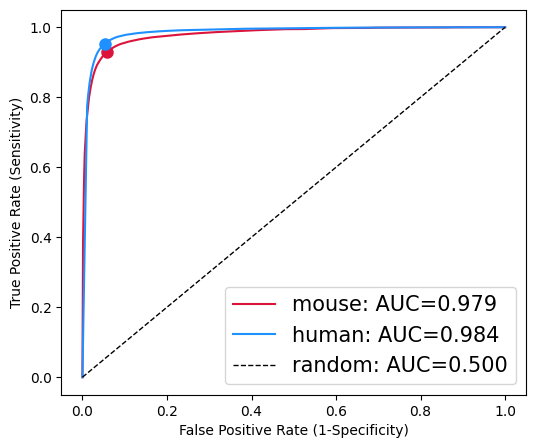

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,5))
plt.rcParams['font.size'] = 16

ROC_plot(mouse_total_true_y_value, mouse_total_y_score, threshold=0.5, color='crimson',base_line=False,legend_label='mouse')
ROC_plot(total_true_y_value, total_y_score, threshold=0.5, color='dodgerblue',legend_label='human')
plt.legend(fontsize=15)
#plt.savefig('/mnt/ruiyanhou/nfs_share2/three_primer/figure/deep_learning_mouse_human.pdf',dpi=300,bbox_inches='tight')
plt.show()